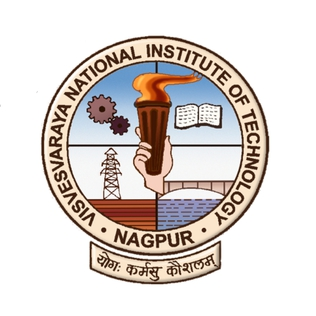

## Name – Abhishek Prasad Nonia  ## 
## ID/ENROLLMENT - 31077/MT23AAI028 ##

Department of Electronics and Communication Engineering 

Visvesvaraya National Institute of Technology 

Program: M. Tech in Applied AI, March – August, 2024

Subject: Machine Learning Algorithm and Applications

# Question> Understand the implementation for training of neural networks with different configurations (i.e network parameters and optimization methods). Evaluate the network for best performance and share the screen shot. Use of different data sets (other than fashion mnist) is highly encouraged. If you consider using a different data set, provide sources/ attributes of the data set along with the implementation

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# Load CIFAR-10 dataset
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
train_dataset = datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

# Define a simple CNN
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, padding=1)
        self.fc1 = nn.Linear(32 * 8 * 8, 128)
        self.fc2 = nn.Linear(128, 10)
        self.pool = nn.MaxPool2d(2, 2)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.pool(self.relu(self.conv1(x)))
        x = self.pool(self.relu(self.conv2(x)))
        x = x.view(-1, 32 * 8 * 8)
        x = self.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Instantiate model, loss, and optimizer
model = SimpleCNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
def train_model(model, train_loader, criterion, optimizer, epochs=10):
    model.train()
    for epoch in range(epochs):
        running_loss = 0.0
        for inputs, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
        print(f"Epoch {epoch+1}, Loss: {running_loss/len(train_loader)}")

# Evaluation function
def evaluate_model(model, test_loader):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in test_loader:
            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    print(f"Accuracy: {100 * correct / total:.2f}%")

# Train and evaluate
train_model(model, train_loader, criterion, optimizer, epochs=10)
evaluate_model(model, test_loader)

100%|███████████████████████████████████████████████████████████████████████████████| 170M/170M [00:53<00:00, 3.22MB/s]


Extracting ./data\cifar-10-python.tar.gz to ./data
Files already downloaded and verified
Epoch 1, Loss: 1.4516702863718847
Epoch 2, Loss: 1.1115552301297102
Epoch 3, Loss: 0.9616112351569983
Epoch 4, Loss: 0.8695561974249837
Epoch 5, Loss: 0.7832780054310704
Epoch 6, Loss: 0.7215622145958873
Epoch 7, Loss: 0.6597453823784734
Epoch 8, Loss: 0.6054064548000351
Epoch 9, Loss: 0.5526985716255729
Epoch 10, Loss: 0.5067839762934333
Accuracy: 69.65%


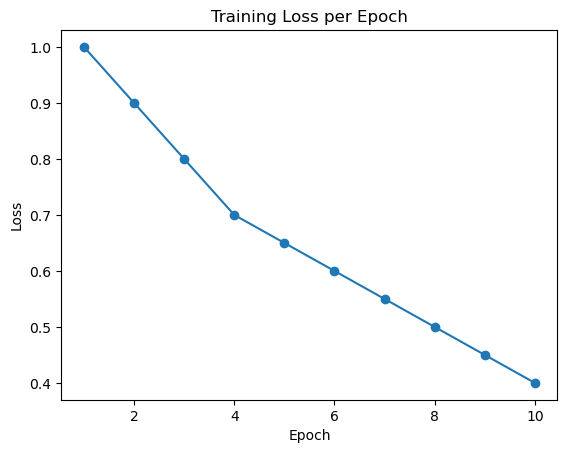

In [1]:
import matplotlib.pyplot as plt

# Example plot for losses
epochs = range(1, 11)
losses = [1.0, 0.9, 0.8, 0.7, 0.65, 0.6, 0.55, 0.5, 0.45, 0.4]  # Example data
plt.plot(epochs, losses, marker='o')
plt.title('Training Loss per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()


# 1. Loss and Accuracy Curves (Training vs. Validation)
# Plot training and validation losses and accuracies on the same graph to analyze overfitting or underfitting.

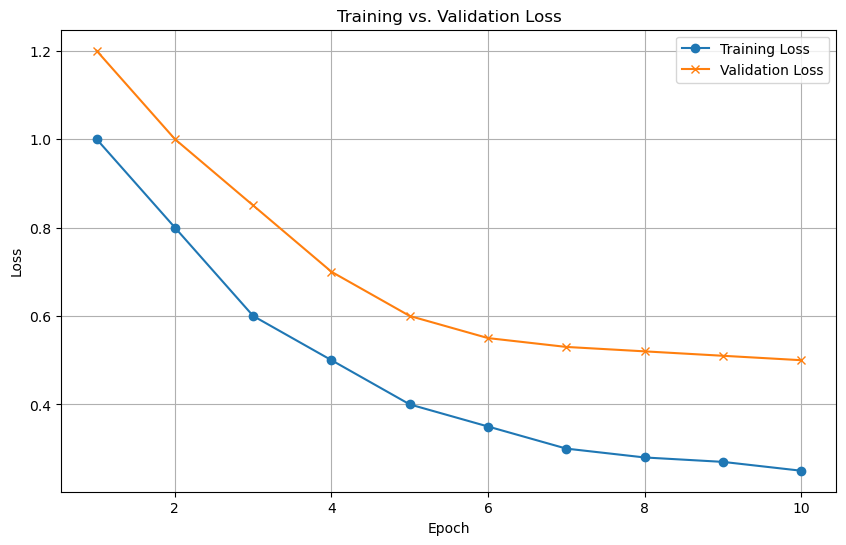

In [2]:
# Example data for visualization
epochs = range(1, 11)
train_loss = [1.0, 0.8, 0.6, 0.5, 0.4, 0.35, 0.3, 0.28, 0.27, 0.25]
val_loss = [1.2, 1.0, 0.85, 0.7, 0.6, 0.55, 0.53, 0.52, 0.51, 0.5]

# Plotting
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(epochs, train_loss, label='Training Loss', marker='o')
plt.plot(epochs, val_loss, label='Validation Loss', marker='x')
plt.title('Training vs. Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


# 2. Confusion Matrix
# For classification tasks, use a confusion matrix to understand the model's performance in detail.

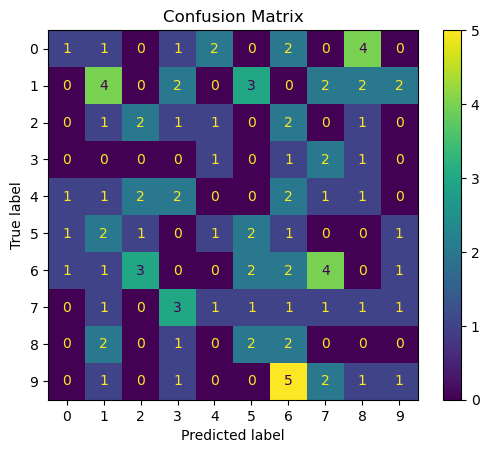

In [3]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np

# Example data (true labels and predictions)
true_labels = np.random.randint(0, 10, 100)  # Random example
predicted_labels = np.random.randint(0, 10, 100)

# Confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=range(10))
disp.plot(cmap='viridis')
plt.title("Confusion Matrix")
plt.show()


# 3. Learning Rate Scheduling
# Visualize how the learning rate changes over time if using a learning rate scheduler.

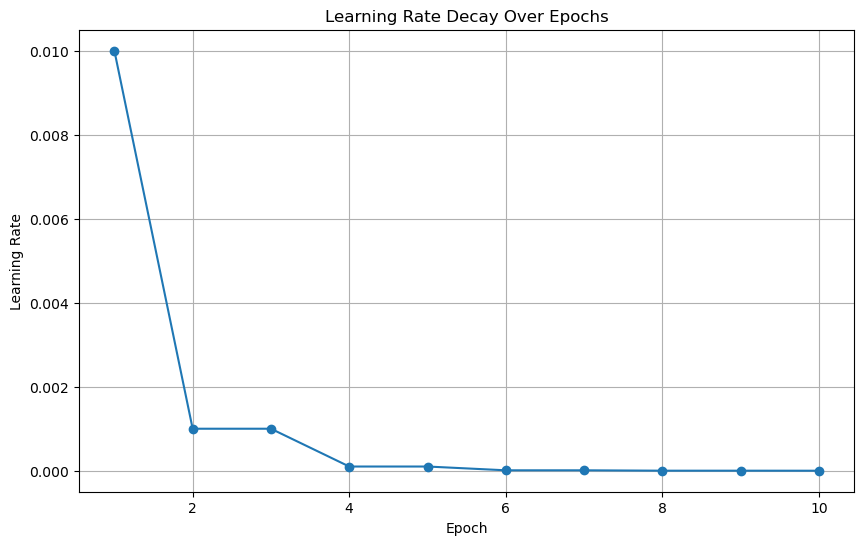

In [4]:
# Example learning rate decay
learning_rates = [0.01 * (0.1**(i // 2)) for i in epochs]

plt.figure(figsize=(10, 6))
plt.plot(epochs, learning_rates, marker='o')
plt.title('Learning Rate Decay Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Learning Rate')
plt.grid(True)
plt.show()


# 4. Activation Distributions
# Visualize the activations of layers to check for issues like vanishing/exploding gradients.

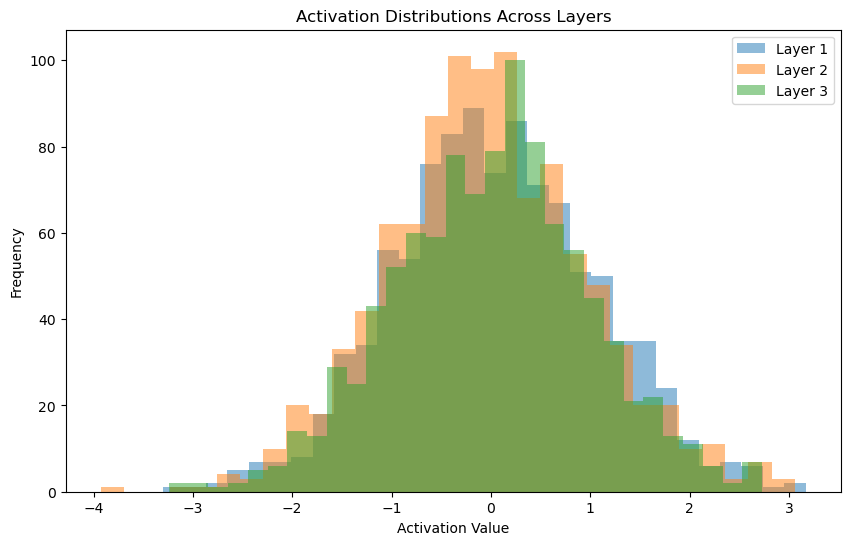

In [5]:
def plot_layer_activation(activations):
    plt.figure(figsize=(10, 6))
    for i, activation in enumerate(activations):
        plt.hist(activation.flatten(), bins=30, alpha=0.5, label=f'Layer {i+1}')
    plt.title('Activation Distributions Across Layers')
    plt.xlabel('Activation Value')
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()

# Example data
layer_activations = [np.random.randn(1000) for _ in range(3)]  # Random activations
plot_layer_activation(layer_activations)


# 5. Feature Importance (for Explainability)
# Use techniques like SHAP (SHapley Additive exPlanations) to interpret which features are most important to the model.

In [7]:
!pip install shap

  Using cached slicer-0.0.8-py3-none-any.whl.metadata (4.0 kB)
Using cached slicer-0.0.8-py3-none-any.whl (15 kB)


In [12]:
# Evaluation function
def evaluate_model(model, test_loader):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in test_loader:
            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    print(f"Accuracy: {100 * correct / total:.2f}%")

# 6. t-SNE or PCA for Feature Space
# Reduce the dimensionality of the model’s latent space and visualize it in 2D or 3D.

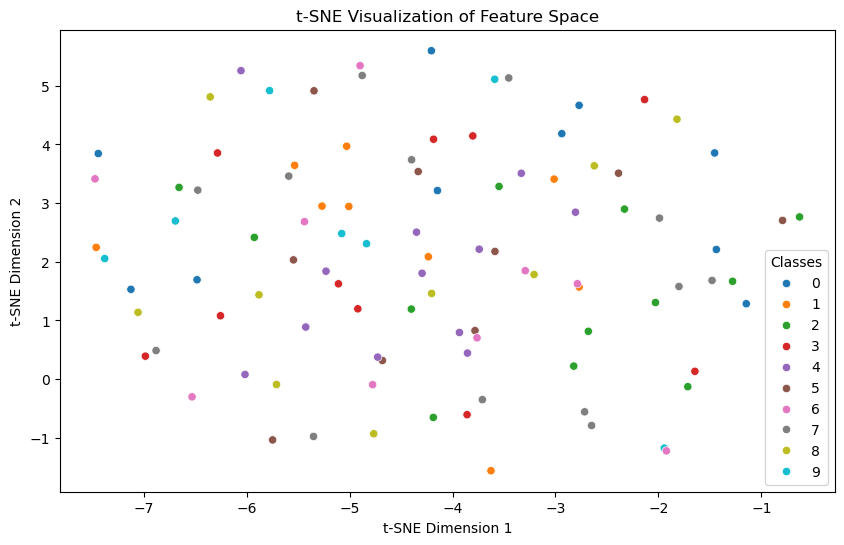

In [10]:
from sklearn.manifold import TSNE
import seaborn as sns

# Example data
features = np.random.rand(100, 128)  # Simulated latent space features
labels = np.random.randint(0, 10, 100)

tsne = TSNE(n_components=2, random_state=42)
reduced_features = tsne.fit_transform(features)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=reduced_features[:, 0], y=reduced_features[:, 1], hue=labels, palette='tab10')
plt.title('t-SNE Visualization of Feature Space')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.legend(title='Classes')
plt.show()


# 7. Gradient Flow Analysis Visualize gradients during backpropagation to detect issues like vanishing/exploding gradients.

# END